# UCI Machine Learning - Mushroom

* DNN Classifier

  - target : poisonous

In [43]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np               
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [44]:
data = pd.read_csv('agaricus-lepiota.data', encoding='cp949')

print(data)

      p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0     e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1     e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2     p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3     e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4     e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g
...  .. .. .. .. ..  .. .. ..  .. ..  ...  .. ..  ..  ..  .. ..  ..  ..  .. ..
8118  e  k  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   b   c  l
8119  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   n  o   p   b   v  l
8120  e  f  s  n  f   n  a  c   b  n  ...   s  o   o   p   o  o   p   b   c  l
8121  p  k  y  n  f   y  f  c   n  b  ...   k  w   w   p   w  o   e   w   v  l
8122  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   o   c  l

[8123 rows x 23 columns]


In [45]:
for i in data:
    data[i] = data[i].astype('category').cat.codes
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

print(X.shape)
print(y.unique())

(8123, 22)
[0 1]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [47]:
m = keras.Sequential([
  keras.layers.Dense(32, input_shape=[22,], activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(2)  
])

m.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


h = m.fit(X_train, y_train, epochs=10)

Epoch 1/10
191/191 [==============================] - 1s 642us/step - loss: 0.5798 - accuracy: 0.8101
Epoch 2/10
191/191 [==============================] - 0s 658us/step - loss: 0.2062 - accuracy: 0.9281
Epoch 3/10
191/191 [==============================] - 0s 621us/step - loss: 0.1456 - accuracy: 0.9424
Epoch 4/10
191/191 [==============================] - 0s 637us/step - loss: 0.1097 - accuracy: 0.9537
Epoch 5/10
191/191 [==============================] - 0s 647us/step - loss: 0.0798 - accuracy: 0.9709
Epoch 6/10
191/191 [==============================] - 0s 642us/step - loss: 0.0572 - accuracy: 0.9839
Epoch 7/10
191/191 [==============================] - 0s 624us/step - loss: 0.0409 - accuracy: 0.9918
Epoch 8/10
191/191 [==============================] - 0s 616us/step - loss: 0.0290 - accuracy: 0.9941
Epoch 9/10
191/191 [==============================] - 0s 610us/step - loss: 0.0208 - accuracy: 0.9962
Epoch 10/10
191/191 [==============================] - 0s 626us/step - loss: 0.016

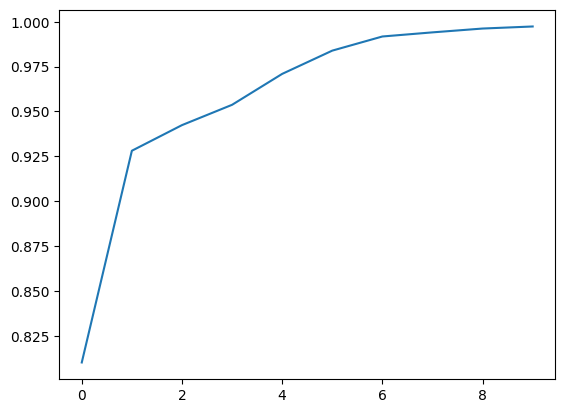

In [48]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()

axe.plot(h.history['accuracy'])